<a href="https://colab.research.google.com/github/9-coding/Life_Expectancy_DataScicence/blob/main/Life_Expectancy_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#drive mount
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 

Mounted at /content/mnt


In [ ]:
# Change working directory to the location where the file is stored
%cd /content/mnt/MyDrive/Colab Notebooks/DataScience

/content/mnt/MyDrive/Colab Notebooks/DataScience


===================== Dataset shape =====================
(2938, 22)

===================== Dataset index =====================
RangeIndex(start=0, stop=2938, step=1)

===================== Dataset Columns =====================
Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

===================== Dataset info =====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year         

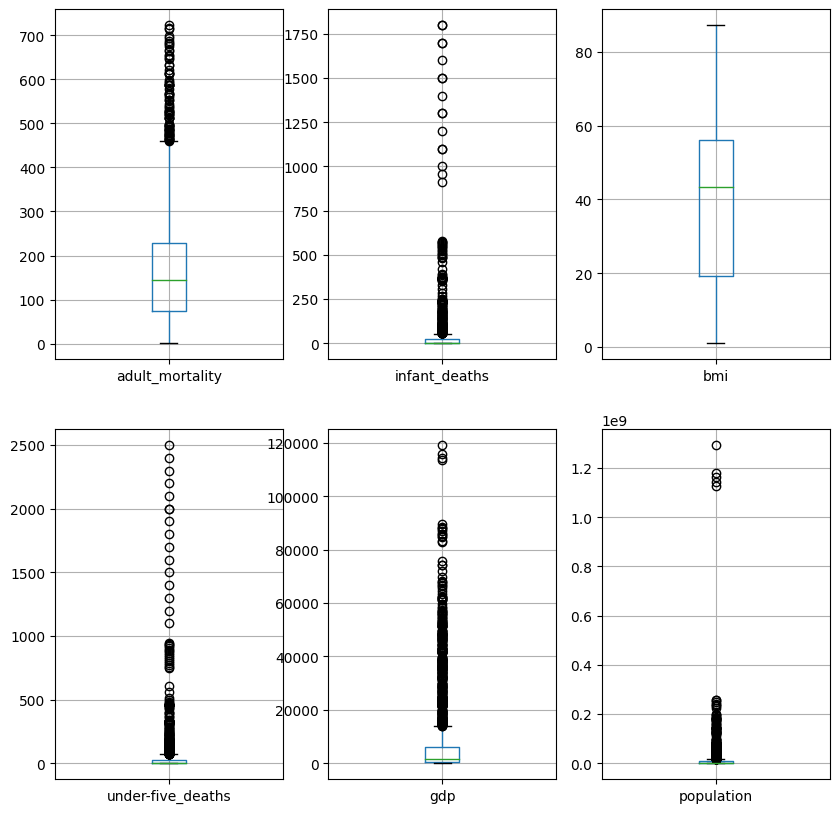

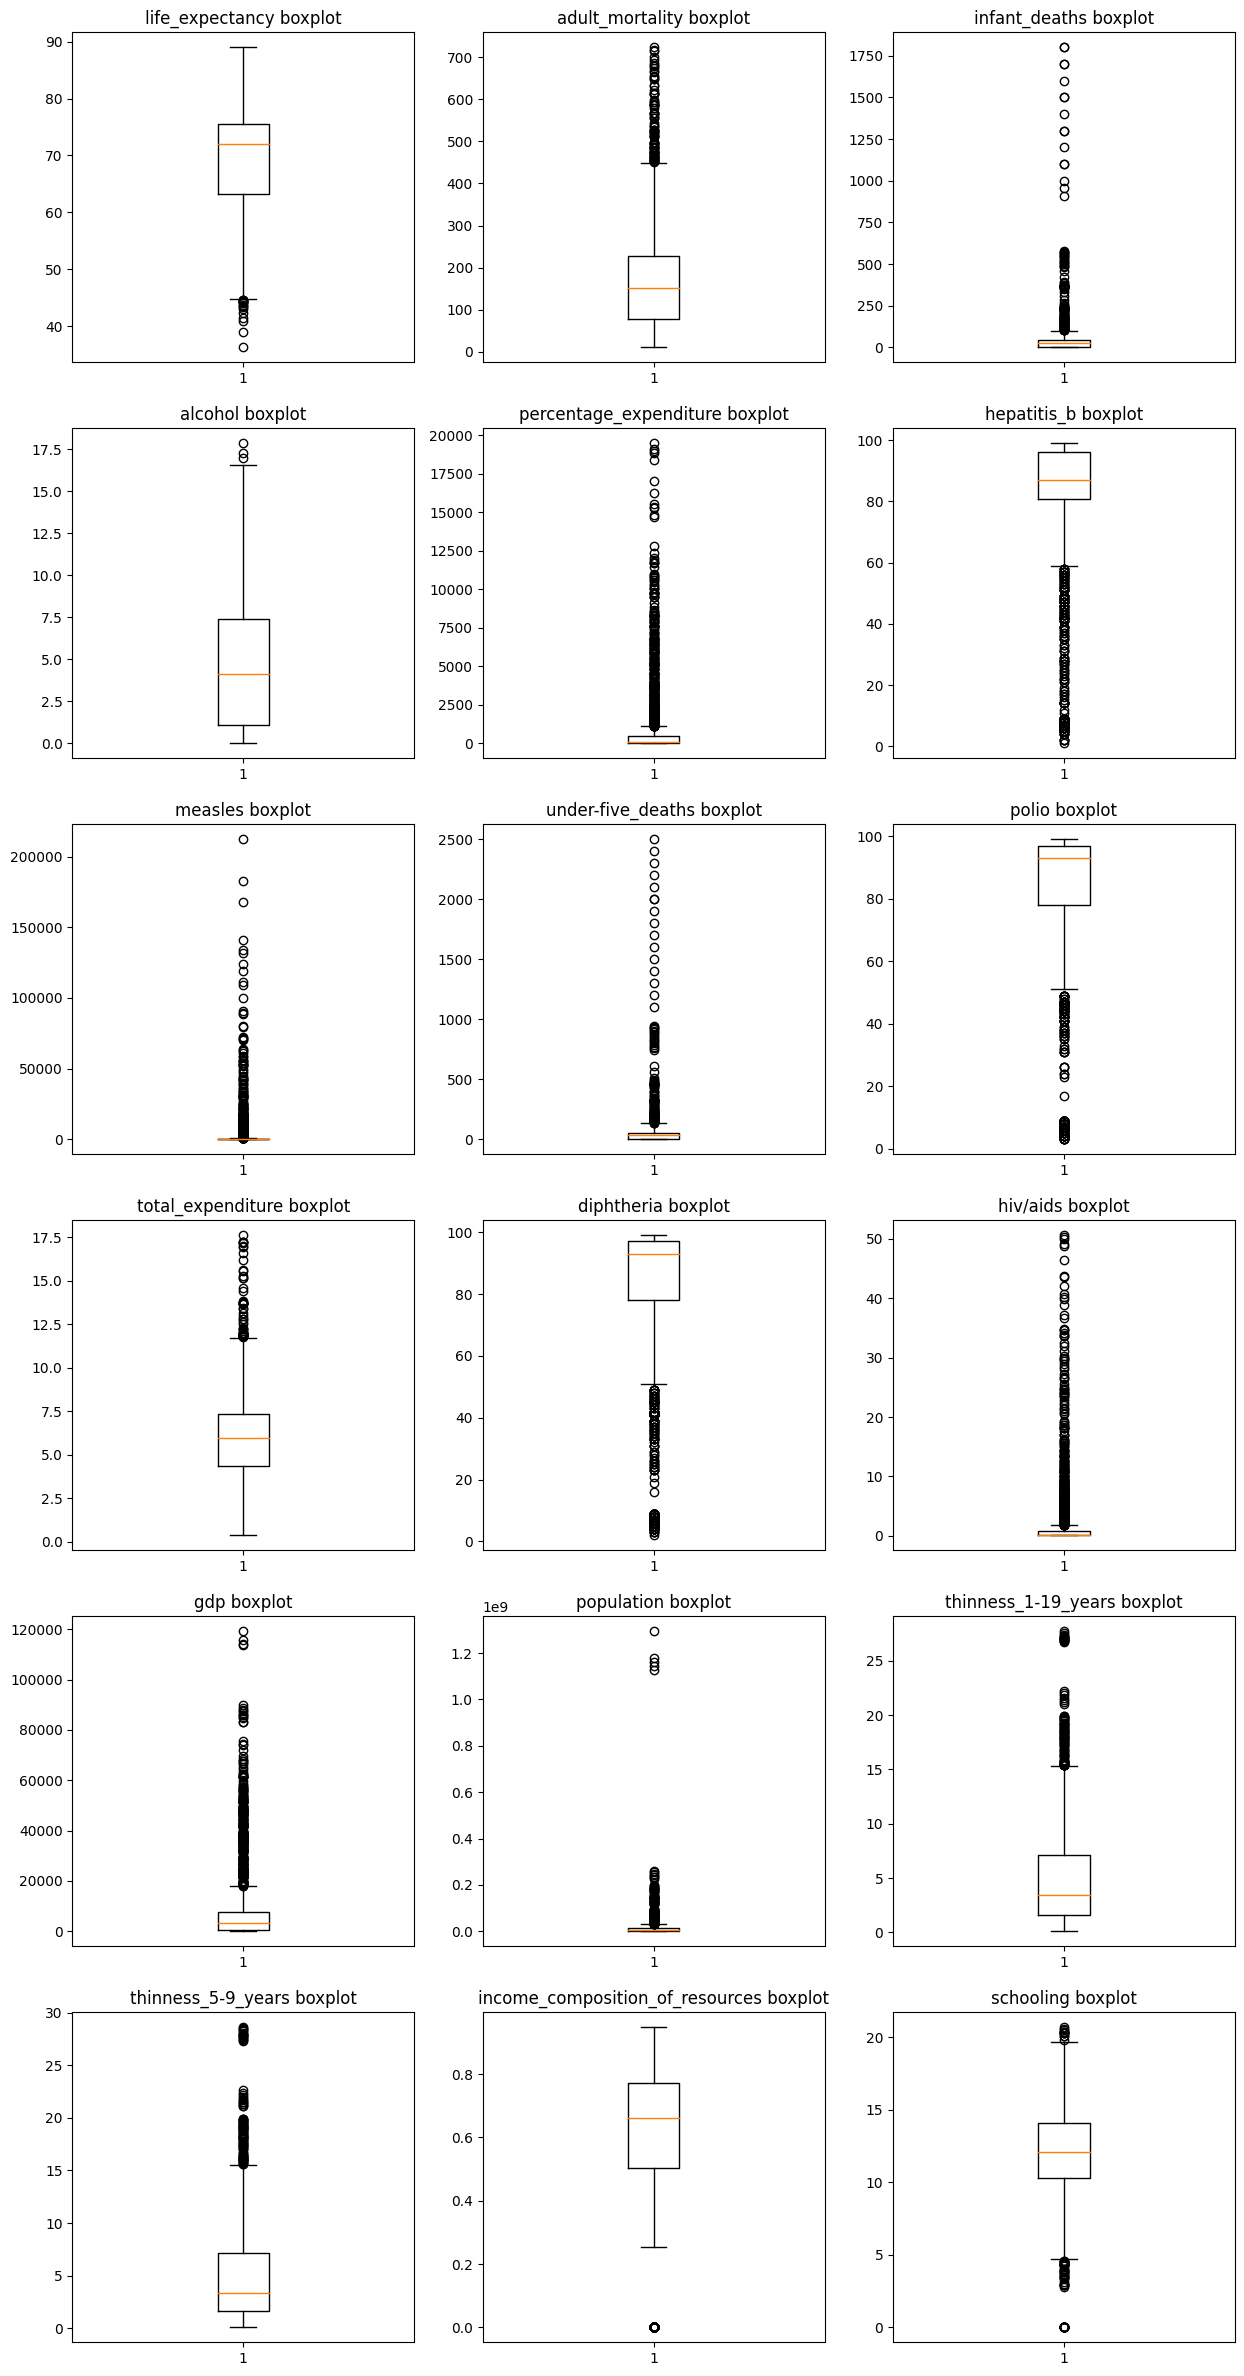

Before handling outlier data

---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 91
Percent of data that is outlier: 3.1%
---------------infant_deaths---------------
Number of outliers: 137
Percent of data that is outlier: 4.66%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 316
Percent of data that is outlier: 10.76%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------under-five_deaths---------------
Number of outliers: 148
Percent of data that is outlier: 5.04%
---------------polio---------------
Number of outliers: 279
Percent of data that is outlier: 9.5%
---------------t

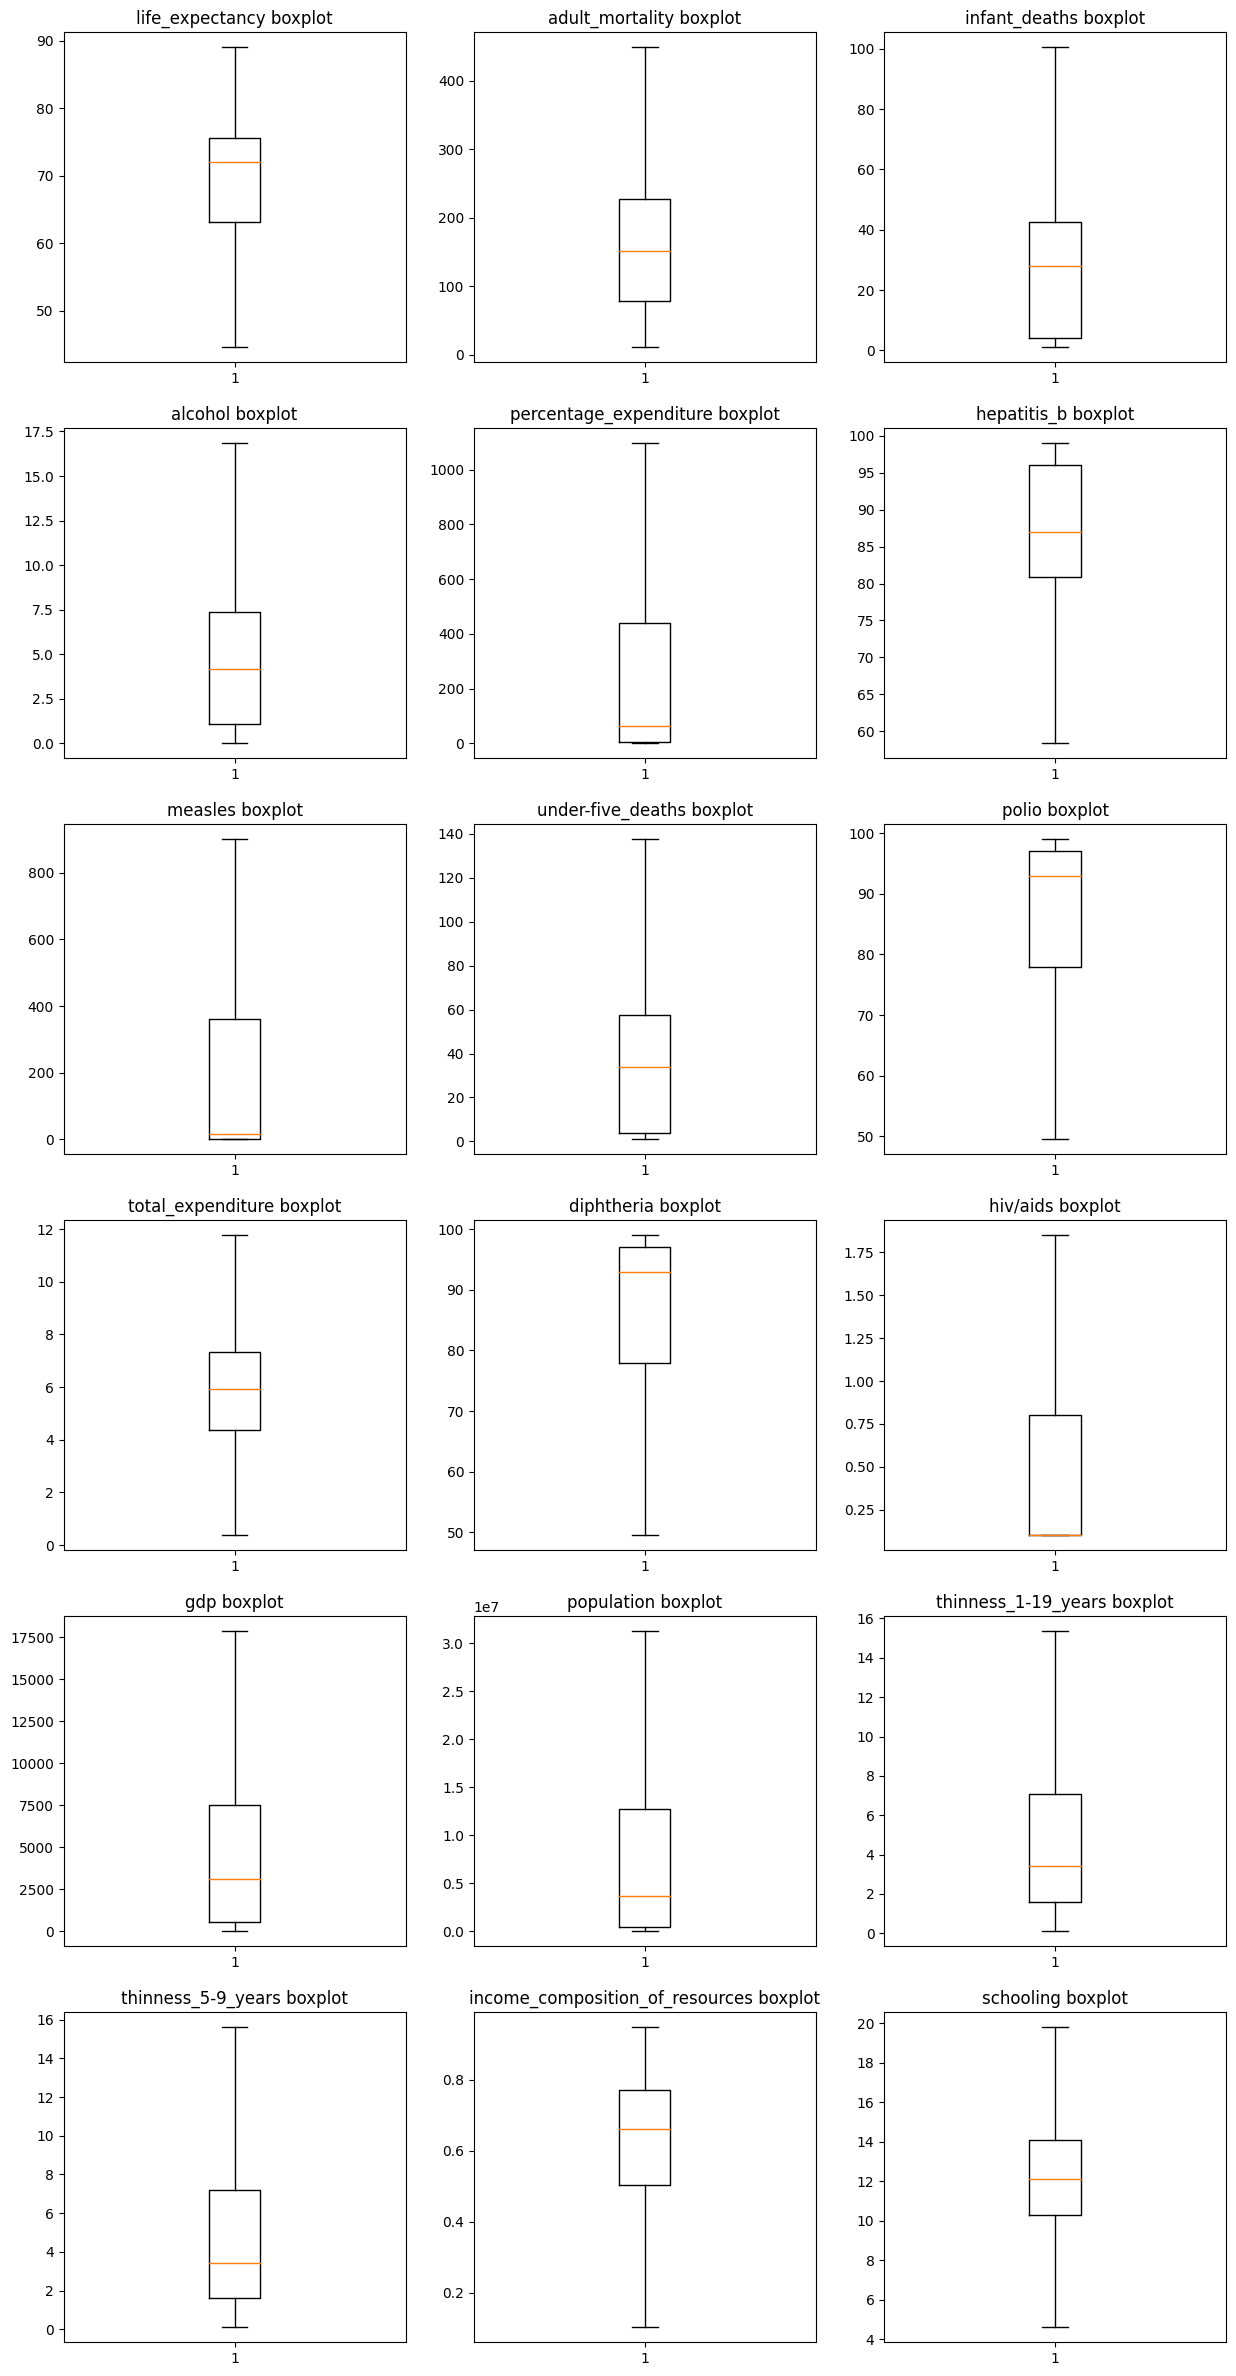

                                     year  life_expectancy  adult_mortality  \
year                             1.000000         0.169343        -0.066549   
life_expectancy                  0.169343         1.000000        -0.686022   
adult_mortality                 -0.066549        -0.686022         1.000000   
infant_deaths                   -0.021480        -0.215499         0.118233   
alcohol                         -0.048212         0.392769        -0.187475   
percentage_expenditure           0.032619         0.488264        -0.299344   
hepatitis_b                      0.141336         0.297688        -0.208828   
measles                         -0.121195        -0.336470         0.218410   
under-five_deaths               -0.038581        -0.290762         0.166611   
polio                            0.115490         0.567447        -0.350369   
total_expenditure                0.080874         0.214168        -0.120505   
diphtheria                       0.147625         0.

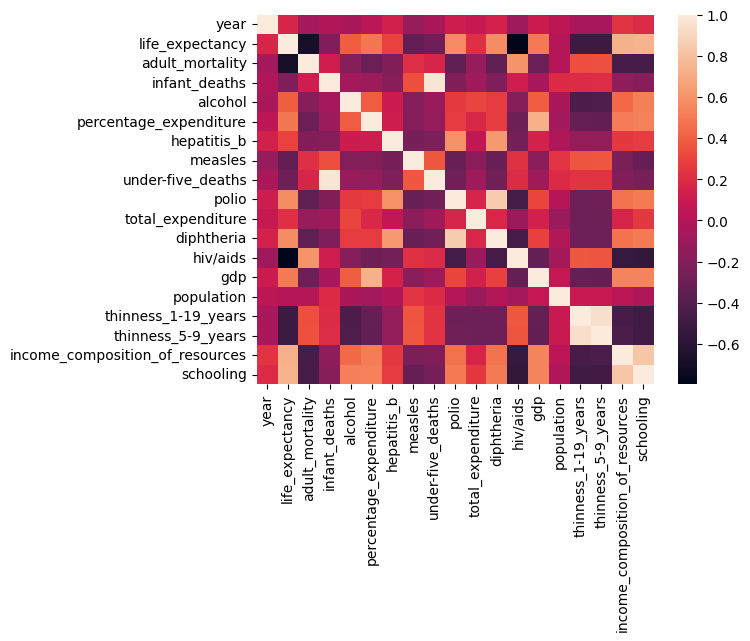

In [ ]:
# Importing all the required Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the datasets
df=pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/DataScience/dataset/Life Expectancy Data.csv')

# Rename columns by removing spaces, replacing spaces with underscores, and converting to lowercase
def cleaning_variable_descriptions(df):
    df.columns = [col.strip().replace('  ', ' ').replace(' ', '_').lower() for col in df.columns]

# Function to display dataset information
def display_dataset_info(df):
    # Size of the data 
    print("===================== Dataset shape =====================")
    print(df.shape)

    # Index of the data 
    print("\n===================== Dataset index =====================")
    print(df.index)

    # Columns of the data 
    print("\n===================== Dataset Columns =====================")
    print(df.columns)

    # A Quick Information about the Data
    print("\n===================== Dataset info =====================")
    print(df.info())

    # # Printi histogram for each column. 
    # df.hist(bins=20, figsize=(12,12))
    # plt.show()
    # plt.subplots_adjust(hspace=1)

# Function to handle NaN values with mean values of the data by using fillna
# We can see that there are no NaN values in categorical columns, so for the numerical ones we would fill them with the mean values
def handle_null_values_fillna(df):
    # Checking for NaN Values
    print("===================== Null Value Count Before Handling =====================")
    print(df.isnull().sum())

    # Fill NaN values with mean, median or mode
    df.fillna(df.mean(), inplace=True)

    # Checking for NaN Values after handling
    print("\n===================== Null Value Count After Handling =====================")
    print(df.isnull().sum())

    
# Function to handle NaN values with mean values of the data by using SimpleImputer
def handle_null_values_simpleinputer(df):
    # Checking for NaN Values
    print("===================== Null Value Count Before Handling =====================")
    print(df.isnull().sum())

    from sklearn.impute import SimpleImputer
    imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
    df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
    df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
    df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
    df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
    df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
    df['Polio']=imputer.fit_transform(df[['Polio']])
    df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
    df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
    df['GDP']=imputer.fit_transform(df[['GDP']])
    df['Population']=imputer.fit_transform(df[['Population']])
    df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
    df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
    df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
    df['Schooling']=imputer.fit_transform(df[['Schooling']])

    # Checking for Null Values after handling
    print("\n===================== Null Value Count After Handling =====================")
    print(df.isnull().sum())


def handle_outliers(df):
    # Adult Mortality
    mort_3_percentile = np.percentile(df.adult_mortality.dropna(), 3)   # 하위 10 %
    df.loc[df.adult_mortality < mort_3_percentile, "adult_mortality"] = np.nan     # Change Nan

    # Infant Deaths
    df.infant_deaths.replace(0, np.nan, inplace=True)

    # Body Mass Index (BMI)
    df.loc[(df.bmi < 10) | (df.bmi > 50), "bmi"] = np.nan

    # Under-Five Deaths
    df['under-five_deaths'].replace(0, np.nan, inplace=True)

    return df

def compare_missing_values(df):
    before_outliers = df.isnull().sum()
    df = handle_outliers(df)
    after_outliers = df.isnull().sum()
    
    comparison = pd.DataFrame({'before': before_outliers, 'after': after_outliers})
    comparison['difference'] = comparison['after'] - comparison['before']
    
    return comparison

def outliers_visual(data,column_list):
    plt.figure(figsize=(15, 30))
    i = 0
    for col in column_list:
        i += 1
        plt.subplot(6, 3, i)      # 18
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        #i += 1
        # plt.subplot(9, 4, i)
        # plt.hist(data[col])
        # plt.title('{} histogram'.format(col))
    plt.show()

def outlier_count(col, data=df):  # IQR  
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))


def handle_outliers_iqr(df, column): # IQR  
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Replacing the outliers with the lower and upper bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Rename feature name
cleaning_variable_descriptions(df)

# Show info
display_dataset_info(df)

print(df.describe().iloc[:, 1:])

plt.figure(figsize=(10,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

#plt.show()

print(compare_missing_values(df))
# Due to the high percentage of missing values in the BMI variable, removing it BMI columns.
df.drop(columns='bmi', inplace=True)

# Display dataset information
display_dataset_info(df)

# Replace the NaN Values with mean(or median) values of the data by using simpleInputer or fillna
handle_null_values_fillna(df)
#handle_null_values_simpleinputer(df)

# Step : Outliers detection
# Save df.columns
column_list = list(df.columns)[3:]

# Visualization outliers
outliers_visual(df,column_list)

# Printing percent of data that is outlier (before handling outliers)
print("Before handling outlier data")
print()
for col in column_list:
    outlier_count(col,df)

# Handle outlieres
for col in column_list:
    df = handle_outliers_iqr(df, col)

# Printing percent of data that is outlier (After handling outliers)
print("\n==================================================================================")
print("After handling outlier data")
print() 
for col in column_list:
    outlier_count(col,df)

# Outliers detection
outliers_visual(df,column_list)

corr_data=df.corr()
sns.heatmap(corr_data)
print(corr_data)

covariance = np.array(corr_data)
print(covariance[1])
life_expectancy_cov = covariance[1]
best_features = []

for i in range(19):
  if i == 1:
    continue
  if life_expectancy_cov[i] > 0.45:
    best_features.append(i)


print("best_features")
print(best_features)

feature_list = []

for i in best_features:
  print(i)
  df.columns[i]
  feature_list.append(df.columns[i])

print(feature_list)

# Binning life_expectancy 1 - bmi과 관련있음
life_bins = [0,60,100] # Define life_expectancy bins as 0 to 60, 60 to 100
life_group_names = ['low 60','high 60']
life_categorise = pd.cut(df['life_expectancy'],life_bins,labels=life_group_names)

df['life_expectancy_categorise'] = life_categorise
print(df[['life_expectancy','life_expectancy_categorise']])

# Binning life_expectancy 2
life_bins2 = [0,10,20,30,40,50,60,70,80,90,100] # Define life_expectancy bins as 0 to 60, 60 to 100
life_group_names2 = ['0 to 10','10 to 20', '20 to 30','30 to 40','40 to 50','50 to 60', '60 to 70','70 to 80','80 to 90','90 to 100']
life_categorise2 = pd.cut(df['life_expectancy'],life_bins2,labels=life_group_names2)

df['life_expectancy_categorise2'] = life_categorise2
print(df[['life_expectancy','life_expectancy_categorise2']])

df.head()

'''
# Binning alcohol
alcohol_bins = [0,8.8,17]
alcohol_group_names = ['low','high']
alcohol_categorise = pd.cut(df['alcohol'],alcohol_bins,labels=alcohol_group_names)

df['alcohol_categorise'] = alcohol_categorise
print(df[['alcohol','alcohol_categorise']])

# Binning adult_mortality
adult_mortality_categorise = pd.cut(df['adult_mortality'], bins = (0,100,200,300,400,500), labels = ['low 100', '100 to 200', '200 to 300', '300 to 400', '400 to 500'])

df['adult_mortality_categorise'] = adult_mortality_categorise
print(df[['adult_mortality','adult_mortality_categorise']])

# Binning schooling - alcohol column과 연관성이 있음
schooling_categorise = pd.cut(df['schooling'], bins = (0,5,10,15,20),
                              labels = ['g1', 'g2', 'g3', 'g4'])

df['schooling_categorise'] = schooling_categorise
print(df[['schooling','schooling_categorise']])

df.head()
'''

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df.country)
df['country'] = encoder.transform(df.country)
encoder_1 = LabelEncoder()
encoder_1.fit(df.status)
df['status'] = encoder_1.transform(df.status)

# Decision Tree Classification

In the previous process, decision tree classification is performed for classes that divide target data into 0-60/60-100 and classes that divide life expectancy into 10 units.

For each data
1. Create decision tree without any constraints
2. Use Gridsearchcv to apply optimal parameters to reduce overfitting.

For each tree
Tree Visualization
Accuracy calculation for train/test data (individual accuracy output when cross-validation is performed)

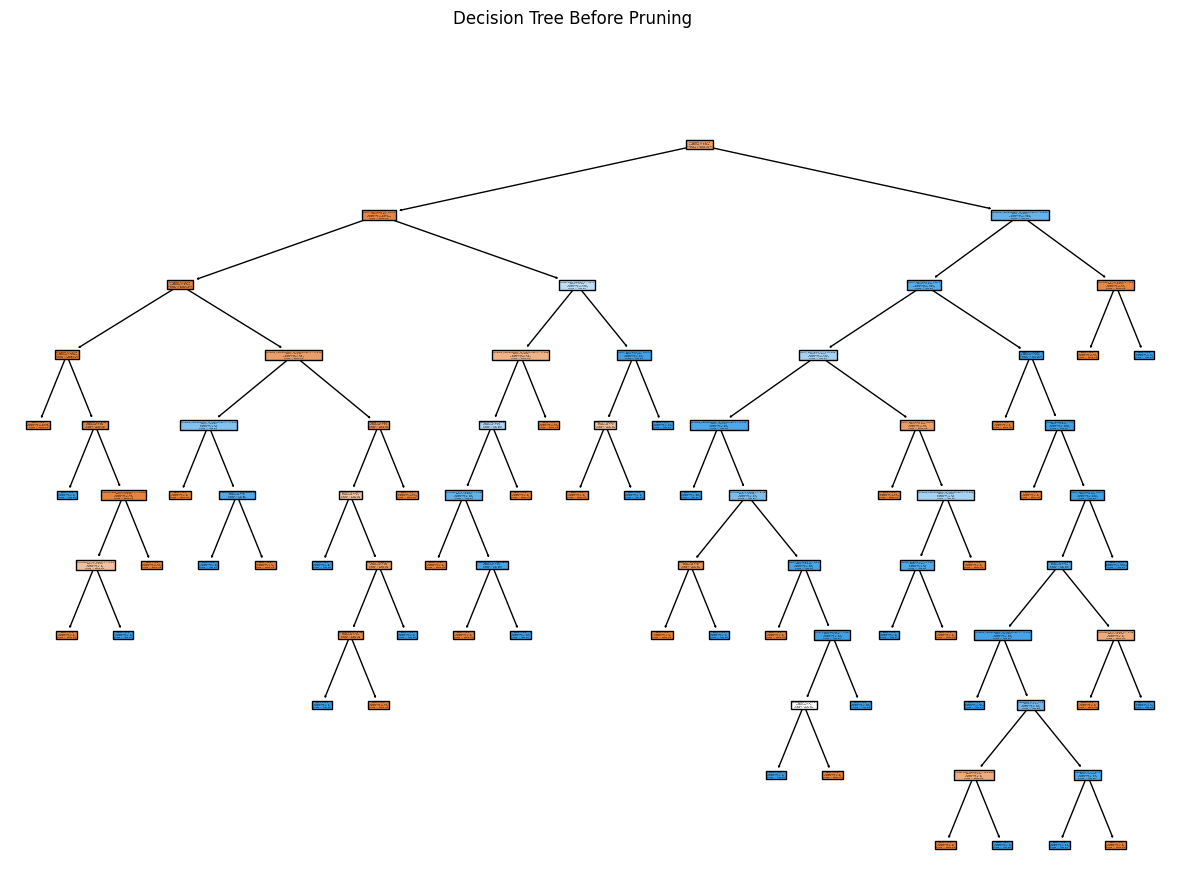

Before Pruning
Train data accuracy:  1.0
Test data accuracy:  0.9608843537414966
Best parameters
{'max_depth': 19, 'min_impurity_decrease': 0.0005, 'min_samples_split': 2}


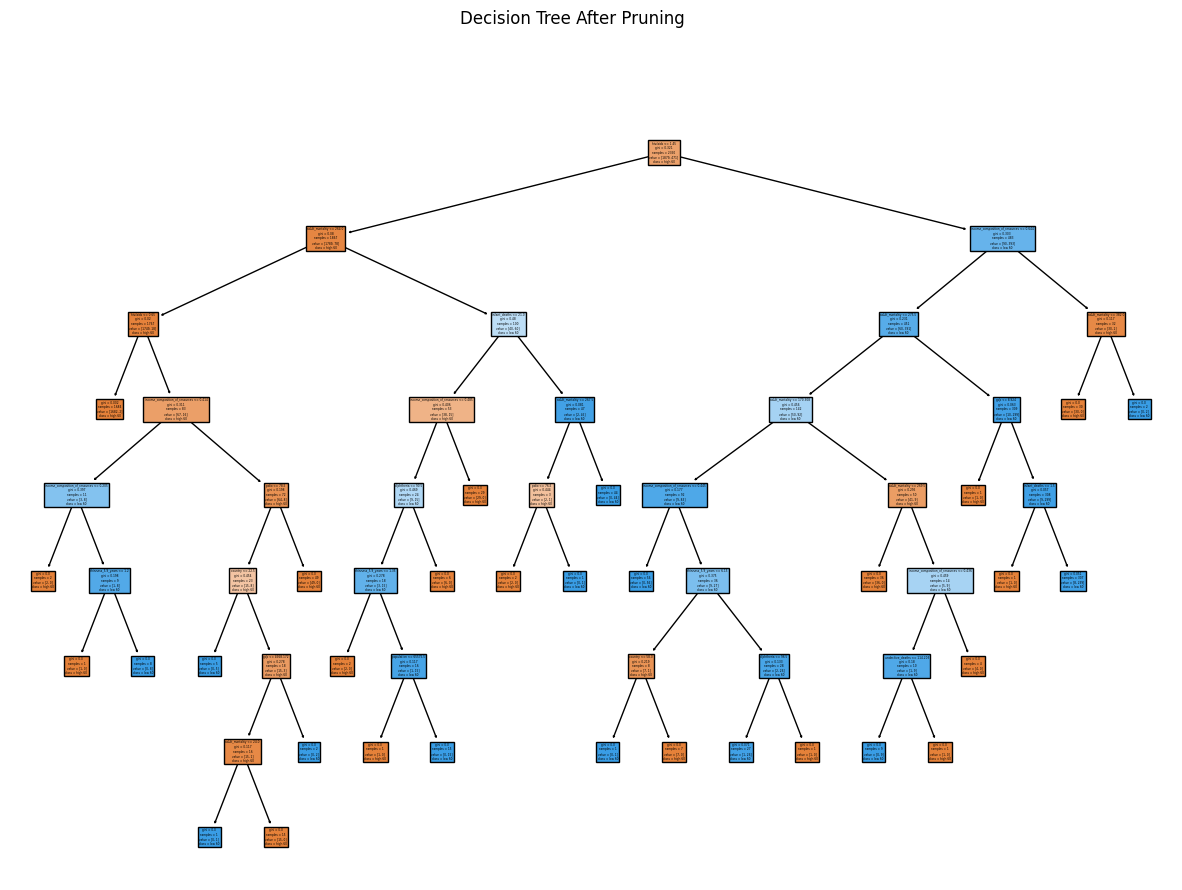

After Pruning


KeyError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt


params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

# Function to draw a tree
def drawTree(title, model, features):
  fig = plt.figure(figsize=(15, 10), facecolor='white')
  plt.suptitle(title)
  plot_tree(model,
            filled=True,
            feature_names=features.columns, 
            class_names=model.classes_, 
          )
  plt.show()

# Comparison of the shape and accuracy of the decision tree with the optimal hyperparameters with all features learned
def makeDecisionTree(features, target):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

  # Creating and training the decision tree classifier
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Evaluating the model
  drawTree("Decision Tree Before Pruning", model, features)

  print("Before Pruning")
  train_accuracy = model.score(X_train, y_train)
  print("Train data accuracy: ", train_accuracy)
  accuracy = model.score(X_test, y_test)
  print("Test data accuracy: ", accuracy)
  

  # Cross Validation using K-fold validation
  kf = KFold(n_splits=10, shuffle=True)

  # Gridsearchcv enables optimal hyperparameters such as pruning, min impurity
  gs = GridSearchCV(DecisionTreeClassifier(), params, cv=kf, n_jobs=-1)
  gs.fit(X_train, y_train)

  print("Best parameters")
  print(gs.best_params_)

  dt = gs.best_estimator_

  # Evaluating the model
  drawTree("Decision Tree After Pruning", dt, features)
  print("After Pruning")
  print("Train data: ", dt.score(X_train, y_train))
  print("Test data: ", dt.score(X_test, y_test))

# Decision tree classified by class with life expectancy 0-60 / 60-100
features = df.drop(['life_expectancy', 'life_expectancy_categorise', 'life_expectancy_categorise2'], axis=1)
target = df['life_expectancy_categorise']

makeDecisionTree(features, target)

# Life expectancy 0–10 / 10–20 / ... / Decision tree classified by class of 90-100
features = df.drop(['life_expectancy', 'life_expectancy_categorise', 'life_expectancy_categorise2'], axis=1)
target = df['life_expectancy_categorise2']

makeDecisionTree(features, target)
